# Linear Regression



In [16]:
import warnings
warnings.filterwarnings('ignore')

# Set up notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home_directory = "C:/Users/rober/DataspellProjects/Machine-Learning-Sandbox"

operators = pd.read_csv(
    filepath_or_buffer=home_directory + "/data/08_rainbow_six/players_rainbow_six.csv"
)

# Features (numpy arrays)
X = operators[["time_played", "kills", "deaths", "wins", "losess"]].values
# Target variable (numpy arrays)
y = operators[["xp"]].values

In [17]:
operators.head()

,Unnamed: 0,player_name,kills,deaths,wins,losess,xp,headshots,melee_kills,games_played,time_played
0,0,imBrendyn,39693,27208,3963,2524,87180363,16789,336,6487,2105
1,1,bestboy021,52978,31853,6332,2716,111206504,18196,1204,9048,2440
2,2,ATKAbdul,32141,31353,4525,2892,89109230,12652,564,7417,2184
3,3,BugglyJR,44525,33800,4723,3030,111741958,18692,788,7753,2481
4,4,Rozhiin,16972,18249,2730,1965,46063186,5785,409,4695,1337


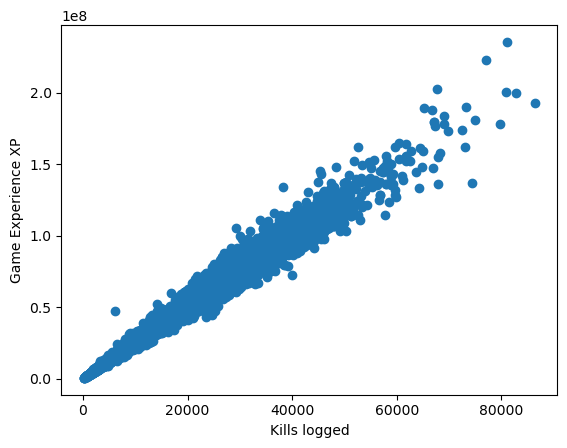

In [18]:
import matplotlib.pyplot as plt
plt.scatter(operators['kills'], operators['xp'])
plt.ylabel("Game Experience XP")
plt.xlabel("Kills logged")
plt.show()

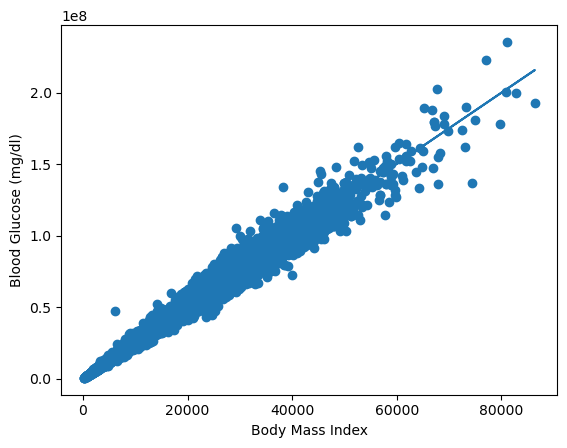

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X = operators['kills'].values.reshape(-1,1)
reg.fit(X, y)

predictions = reg.predict(X)
plt.scatter(X, y)

plt.plot(X, predictions)

plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")

plt.show()


## Cross Validation

This is an example of a 5-fold CV.

![CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

---

Notice that the default score is R-squared




In [24]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

reg = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=kf)

print('5-Fold CV scores: ', cv_results)

print('Mean: ', np.mean(cv_results), ', Std: ', np.std(cv_results))

print('95% interval: ', np.quantile(cv_results, [0.025, 0.975]))

5-Fold CV scores:  [0.97454225 0.9764449  0.97538107 0.97368255 0.97214453]
Mean:  0.9744390599691146 , Std:  0.0014668752119469768
95% interval:  [0.97229833 0.97633852]
